In [1]:
import pandas as pd
from pathlib import Path

import json

TWITTER_BASE = Path('/data/blockchain-interoperability/blockchain-social-media/twitter-data/')

ids = pd.read_pickle(TWITTER_BASE/'snapshots/id.pkl')
timestamps = pd.to_datetime(pd.read_pickle(TWITTER_BASE/'snapshots/timestamp_ms.pkl'),unit='ms')
kmeans_clusters = json.load(open(TWITTER_BASE/'kmeans_clusters/kmeans_init_clusters.json'))


In [2]:
df = pd.concat([ids,timestamps],axis=1)

TypeError: 'Series' object is not callable

In [21]:
import seaborn as sns

per_delta = pd.DataFrame([
    (timestamp,len(subgroup))
    for timestamp,subgroup in df.resample('30min', on='timestamp_ms')
],columns=['timedelta','tweet_count'])
    



<AxesSubplot: xlabel='timedelta', ylabel='tweet_count'>

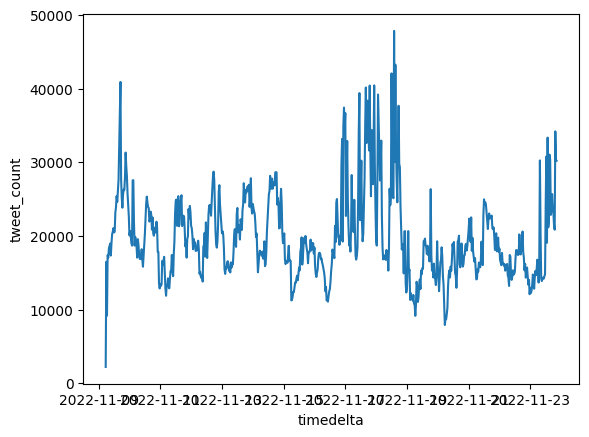

In [23]:
sns.lineplot(
    per_delta,
    x = 'timedelta',
    y = 'tweet_count'
)

In [3]:
# for cluster_id,idxs in kmeans_clusters.items():
#     TWITTER_BASE/f'kmeans_clusters/{cluster_id}'

In [5]:
pd.Grouper(key=)

0           12.0
1           12.0
2           12.0
3           12.0
4           12.0
            ... 
14973492     NaN
14973493    20.0
14973494     NaN
14973495    20.0
14973496    20.0
Name: timestamp_ms, Length: 14973497, dtype: float64